# Домашнее задание по теме «Работа с переменными»

## Загрузка данных и импорт необходимых библиотек:

Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

In [81]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# загрузка данных
california = fetch_california_housing()

# создание DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# просмотр первых строк данных
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Проверка данных на наличие пропусков:

Проверим, есть ли в данных пропуски, и если они будут найдены, удалим их.

In [82]:
# проверка пропусков
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

`df.isnull()`: Проверяет каждую ячейку DataFrame и возвращает True, если значение в ячейке null (то есть NaN), и False, если нет. Результатом является DataFrame того же размера, состоящий из логических значений (True/False).

`.sum()`: Считает количество значений True для каждого столбца. Поскольку True эквивалентно 1, метод суммирует их, возвращая количество пропущенных значений по каждому столбцу.


Таким образом код написанный выше считает колличество пропусков по каждому столбцу и выводит результат выраженный в колличестве таких пропусков.

Не смотря на отсутствие пропусков в рамках обучения составим код который удаляет строки с пропусками (в лабораторных целях):

In [83]:
# удаление строк с пропусками (если они есть)
df.dropna(inplace=True)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Деление выборки и выделение целевой переменной и признаков

In [84]:
# сохраняем признаки в Х
X = df.drop('MedHouseVal', axis=1)

# целевая переменная
y = df['MedHouseVal']

# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Построение линейной регрессии 

In [85]:
# построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

__Вычислим метрики `RMSE` и `R²` на обучающей и тестовой выборках.__

In [86]:
# вычисление метрик
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# вывод метрик
print(f"RMSE на обучающей выборке: {rmse_train:.2f}")
print(f"RMSE на тестовой выборке: {rmse_test:.2f}")
print(f"R² на обучающей выборке: {r2_train:.2f}")
print(f"R² на тестовой выборке: {r2_test:.2f}")

RMSE на обучающей выборке: 0.72
RMSE на тестовой выборке: 0.75
R² на обучающей выборке: 0.61
R² на тестовой выборке: 0.58


## Построение графика распределения целевой переменной

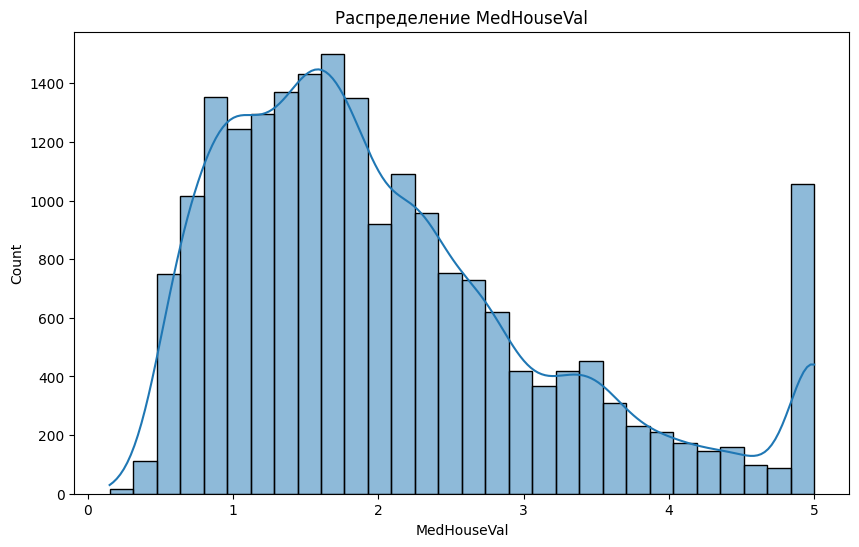

In [87]:
# График распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Распределение MedHouseVal')
plt.show()

График показывает наличие выбросов

## Корреляционный анализ и удаление признаков:

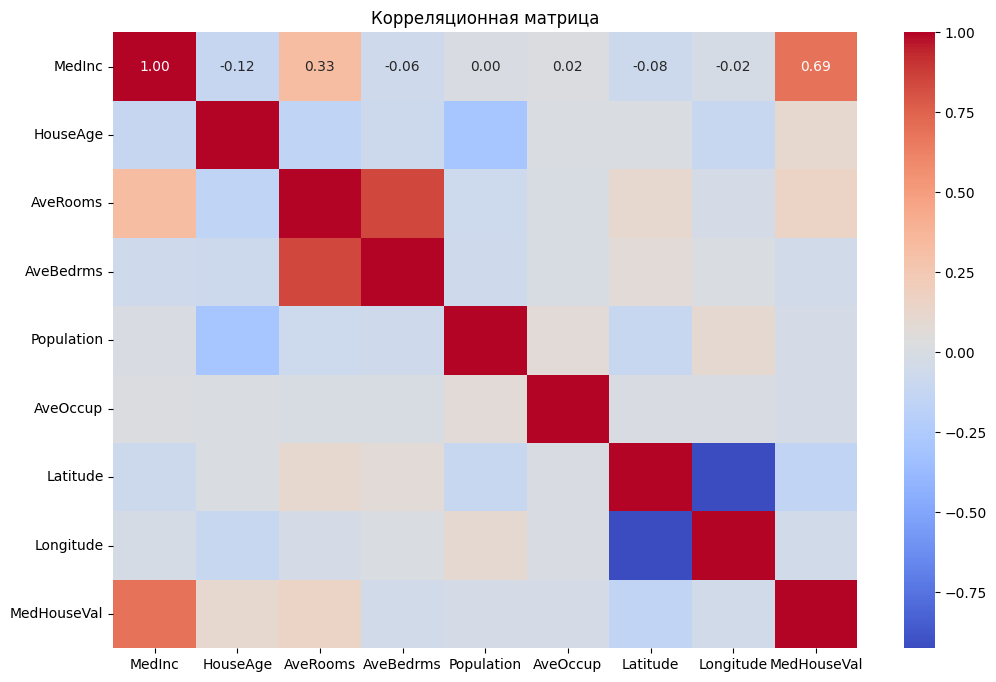

In [88]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

На основании корреляционной матрицы можно сделать выводы об удалении признаков, которые могут быть слабо коррелированы с целевой переменной или имеют высокую взаимную корреляцию.

Исходя из этого удалим: `MedHouseVal`

In [89]:
# Предположим, что 'target' — это ваша целевая переменная
corr_matrix = df.corr()

# Вывод корреляции с целевой переменной
print(corr_matrix['MedHouseVal'].sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [90]:
df.drop(['Latitude'], axis=1, inplace=True)
df.drop(['Population'], axis=1, inplace=True)
df.drop(['AveOccup'], axis=1, inplace=True)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-122.25,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,-121.32,0.847


In [91]:
# сохраняем признаки в Х
X = df.drop('MedHouseVal', axis=1)

# целевая переменная
y = df['MedHouseVal']

# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# вычисление метрик
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# вывод метрик
print(f"RMSE на обучающей выборке: {rmse_train:.2f}")
print(f"RMSE на тестовой выборке: {rmse_test:.2f}")
print(f"R² на обучающей выборке: {r2_train:.2f}")
print(f"R² на тестовой выборке: {r2_test:.2f}")

RMSE на обучающей выборке: 0.78
RMSE на тестовой выборке: 0.80
R² на обучающей выборке: 0.54
R² на тестовой выборке: 0.51


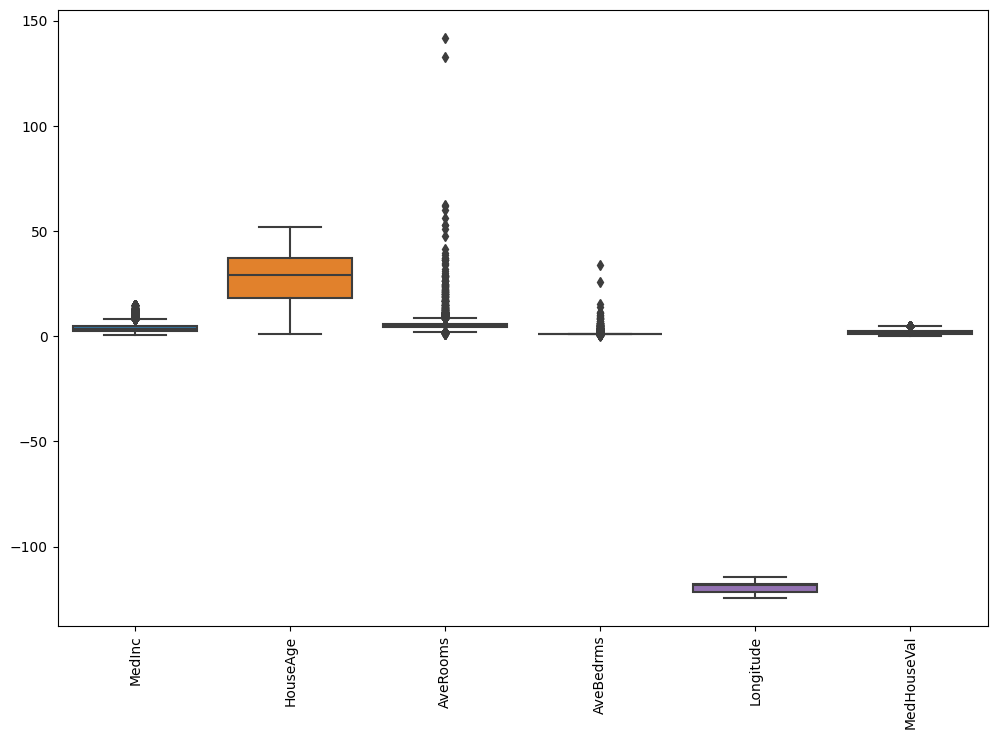

In [93]:
# Диаграммы размаха для признаков
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [94]:
# рассчет нижнего и верхнего порогов для каждого признака
Q1 = df.quantile(0.25)  # первый квартиль для каждого признака
Q3 = df.quantile(0.75)  # третий квартиль для каждого признака
IQR = Q3 - Q1           # межквартильный размах

# определение нижнего и верхнего порога
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# вывод порогов
#print("Нижние пороги:\n", lower_bound)
#print("\nВерхние пороги:\n", upper_bound)

df_s = df[(df['MedInc'] >= lower_bound[0]) & (df['MedInc'] <= upper_bound[0])]
df_s = df[(df['HouseAge'] >= lower_bound[1]) & (df['HouseAge'] <= upper_bound[1])]
df_s = df[(df['AveRooms'] >= lower_bound[2]) & (df['AveRooms'] <= upper_bound[2])]
df_s = df[(df['AveBedrms'] >= lower_bound[3]) & (df['AveBedrms'] <= upper_bound[3])]
df_s = df[(df['Longitude'] >= lower_bound[4]) & (df['Longitude'] <= upper_bound[4])]
df_s = df[(df['MedHouseVal'] >= lower_bound[5]) & (df['MedHouseVal'] <= upper_bound[5])]

Еще раз повторим обучение и деление

In [95]:
# сохраняем признаки в Х
X = df_s.drop('MedHouseVal', axis=1)

# целевая переменная
y = df_s['MedHouseVal']

# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [97]:
# вычисление метрик
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# вывод метрик
print(f"RMSE на обучающей выборке: {rmse_train:.2f}")
print(f"RMSE на тестовой выборке: {rmse_test:.2f}")
print(f"R² на обучающей выборке: {r2_train:.2f}")
print(f"R² на тестовой выборке: {r2_test:.2f}")

RMSE на обучающей выборке: 0.68
RMSE на тестовой выборке: 0.66
R² на обучающей выборке: 0.49
R² на тестовой выборке: 0.53


## Математическое преобразование признаков:

In [102]:
# пример преобразования признаков


df['MedInc_log'] = np.log(df['MedInc'])  # логарифмирование
df['HouseAge_sqrt'] = np.sqrt(df['HouseAge'])  # извлечение корня

In [103]:
# сохраняем признаки в Х
X = df.drop('MedHouseVal', axis=1)

# целевая переменная
y = df['MedHouseVal']

# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# вычисление метрик
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# вывод метрик
print(f"RMSE на обучающей выборке: {rmse_train:.2f}")
print(f"RMSE на тестовой выборке: {rmse_test:.2f}")
print(f"R² на обучающей выборке: {r2_train:.2f}")
print(f"R² на тестовой выборке: {r2_test:.2f}")

RMSE на обучающей выборке: 0.78
RMSE на тестовой выборке: 0.80
R² на обучающей выборке: 0.55
R² на тестовой выборке: 0.51


## Вывод

1) Базовая модель: 
RMSE на обучающей выборке: 0.72
RMSE на тестовой выборке: 0.75
R² на обучающей выборке: 0.61
R² на тестовой выборке: 0.58

Вывод: Базовая модель показывает средние результаты на обеих выборках. Разница между RMSE на обучающей и тестовой выборках незначительна, что говорит о минимальной переобученности, но качество предсказаний (R²) не очень высокое — модель объясняет только около 58% дисперсии данных на тестовой выборке.

2) Модель после удаления коррел. признаков:
RMSE на обучающей выборке: 0.78
RMSE на тестовой выборке: 0.80
R² на обучающей выборке: 0.54
R² на тестовой выборке: 0.51

Вывод: Удаление коррелированных признаков ухудшило качество модели. RMSE увеличилось, а R² снизилось как на обучающей, так и на тестовой выборках. Это говорит о том, что удаление слишком большого количества важных признаков привело к ухудшению предсказательной способности модели.

3) Модель после удаления выбросов:
RMSE на обучающей выборке: 0.68
RMSE на тестовой выборке: 0.66
R² на обучающей выборке: 0.49
R² на тестовой выборке: 0.53

Вывод: Удаление выбросов уменьшило RMSE на обеих выборках, что говорит о том, что модель стала лучше справляться с отклоняющимися значениями. Однако, R² на обучающей выборке заметно снизился (0.49), что может указывать на потерю части информации. Тем не менее, на тестовой выборке качество немного улучшилось (R²=0.53), что можно считать положительным результатом.

4) Модель с математическими преобразованиями:
RMSE на обучающей выборке: 0.78
RMSE на тестовой выборке: 0.80
R² на обучающей выборке: 0.55
R² на тестовой выборке: 0.51

Вывод: Математические преобразования не улучшили метрики модели. RMSE и R² практически аналогичны результатам модели после удаления коррелированных признаков, что свидетельствует о том, что такие преобразования не принесли ожидаемого улучшения.
